In [188]:
""" LSTM prediction: stacked LSTM """

# import libraries
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

In [189]:
rain_data = pd.read_csv('rain_day.csv', encoding='utf-8')
dam_data = pd.read_csv('dam_edit.csv', encoding='utf-8')

In [190]:
data = []

In [191]:
data = pd.merge( dam_data,rain_data, on='date', how='inner')

In [192]:
data = data.fillna(0)

In [193]:
print(data)

       Unnamed: 0        date  dam_t-1    90  100  101  211  212
0               0  1974-01-01    0.000   0.0  0.0  0.0  0.0  0.0
1               1  1974-01-02   10.000   0.0  0.0  0.0  0.0  0.0
2               2  1974-01-03    9.000   0.0  0.0  0.0  0.0  0.0
3               3  1974-01-04    4.800   0.0  0.0  0.0  0.0  0.0
4               4  1974-01-05    6.100   0.0  0.0  0.0  0.0  0.0
...           ...         ...      ...   ...  ...  ...  ...  ...
18257       18257  2023-12-27   30.518   0.0  0.0  0.0  0.0  0.0
18258       18258  2023-12-28   25.873   0.0  0.0  0.0  0.0  0.0
18259       18259  2023-12-29   21.186   0.0  0.0  0.0  0.0  0.0
18260       18260  2023-12-30   20.887   0.7  2.3  9.9  6.8  8.5
18261       18261  2023-12-31   29.183  26.8  6.0  5.3  3.1  4.9

[18262 rows x 8 columns]


In [194]:
compare_data = data

In [195]:
print(dam_data)

       Unnamed: 0        date  dam_t-1
0               0  1974-01-01    0.000
1               1  1974-01-02   10.000
2               2  1974-01-03    9.000
3               3  1974-01-04    4.800
4               4  1974-01-05    6.100
...           ...         ...      ...
18257       18257  2023-12-27   30.518
18258       18258  2023-12-28   25.873
18259       18259  2023-12-29   21.186
18260       18260  2023-12-30   20.887
18261       18261  2023-12-31   29.183

[18262 rows x 3 columns]


In [196]:
dam_data = dam_data.drop('Unnamed: 0', axis = 1)

In [197]:
dam = dam_data.drop('date', axis= 1)

In [198]:
print(rain_data)

             date    90  100  101  211  212
0      1974-01-01   0.0  0.0  0.0  0.0  0.0
1      1974-01-02   0.0  0.0  0.0  0.0  0.0
2      1974-01-03   0.0  0.0  0.0  0.0  0.0
3      1974-01-04   0.0  0.0  0.0  0.0  0.0
4      1974-01-05   0.0  0.0  0.0  0.0  0.0
...           ...   ...  ...  ...  ...  ...
18257  2023-12-27   0.0  0.0  0.0  0.0  0.0
18258  2023-12-28   0.0  0.0  0.0  0.0  0.0
18259  2023-12-29   0.0  0.0  0.0  0.0  0.0
18260  2023-12-30   0.7  2.3  9.9  6.8  8.5
18261  2023-12-31  26.8  6.0  5.3  3.1  4.9

[18262 rows x 6 columns]


In [199]:
data = data[9496:]

In [200]:
data

,Unnamed: 0,date,dam_t-1,90,100,101,211,212
9496,9496,2000-01-01,13.000,1.2,1.0,0.0,0.0,0.0
9497,9497,2000-01-02,15.900,1.1,3.1,8.9,7.0,9.0
9498,9498,2000-01-03,20.400,0.0,0.0,0.0,0.0,0.0
9499,9499,2000-01-04,16.000,0.0,0.0,0.0,0.0,0.0
9500,9500,2000-01-05,13.700,10.4,9.1,12.0,5.8,12.0
...,...,...,...,...,...,...,...,...
18257,18257,2023-12-27,30.518,0.0,0.0,0.0,0.0,0.0
18258,18258,2023-12-28,25.873,0.0,0.0,0.0,0.0,0.0
18259,18259,2023-12-29,21.186,0.0,0.0,0.0,0.0,0.0
18260,18260,2023-12-30,20.887,0.7,2.3,9.9,6.8,8.5


In [201]:
original_dam = data['dam_t-1']

In [202]:
print(original_dam)

9496     13.000
9497     15.900
9498     20.400
9499     16.000
9500     13.700
          ...  
18257    30.518
18258    25.873
18259    21.186
18260    20.887
18261    29.183
Name: dam_t-1, Length: 8766, dtype: float64


In [203]:
# separate dates for future plotting
dates = pd.to_datetime(data['date'])

In [204]:
print(data)

       Unnamed: 0        date  dam_t-1    90  100   101  211   212
9496         9496  2000-01-01   13.000   1.2  1.0   0.0  0.0   0.0
9497         9497  2000-01-02   15.900   1.1  3.1   8.9  7.0   9.0
9498         9498  2000-01-03   20.400   0.0  0.0   0.0  0.0   0.0
9499         9499  2000-01-04   16.000   0.0  0.0   0.0  0.0   0.0
9500         9500  2000-01-05   13.700  10.4  9.1  12.0  5.8  12.0
...           ...         ...      ...   ...  ...   ...  ...   ...
18257       18257  2023-12-27   30.518   0.0  0.0   0.0  0.0   0.0
18258       18258  2023-12-28   25.873   0.0  0.0   0.0  0.0   0.0
18259       18259  2023-12-29   21.186   0.0  0.0   0.0  0.0   0.0
18260       18260  2023-12-30   20.887   0.7  2.3   9.9  6.8   8.5
18261       18261  2023-12-31   29.183  26.8  6.0   5.3  3.1   4.9

[8766 rows x 8 columns]


In [205]:
# variables for training
cols = list(data)[2:8]

In [206]:
print(cols)

['dam_t-1', '90', '100', '101', '211', '212']


In [207]:
print(data)

       Unnamed: 0        date  dam_t-1    90  100   101  211   212
9496         9496  2000-01-01   13.000   1.2  1.0   0.0  0.0   0.0
9497         9497  2000-01-02   15.900   1.1  3.1   8.9  7.0   9.0
9498         9498  2000-01-03   20.400   0.0  0.0   0.0  0.0   0.0
9499         9499  2000-01-04   16.000   0.0  0.0   0.0  0.0   0.0
9500         9500  2000-01-05   13.700  10.4  9.1  12.0  5.8  12.0
...           ...         ...      ...   ...  ...   ...  ...   ...
18257       18257  2023-12-27   30.518   0.0  0.0   0.0  0.0   0.0
18258       18258  2023-12-28   25.873   0.0  0.0   0.0  0.0   0.0
18259       18259  2023-12-29   21.186   0.0  0.0   0.0  0.0   0.0
18260       18260  2023-12-30   20.887   0.7  2.3   9.9  6.8   8.5
18261       18261  2023-12-31   29.183  26.8  6.0   5.3  3.1   4.9

[8766 rows x 8 columns]


In [208]:
# new dataframe with only training data - 5 columns
data = data[cols].astype(float)

In [209]:
# normalize the dataset
scaler = MinMaxScaler(feature_range = (0,1))
dam_data_scaled = scaler.fit_transform(data)

# dam_data_scaled = scaler.transform(data)

In [210]:
scaler_dam = MinMaxScaler(feature_range=(0,1))
scaler_dam = scaler_dam.fit(dam)

dam_scaled = scaler_dam.transform(dam)

In [211]:
print(dam_data_scaled)

[[0.00308923 0.00325468 0.00140351 0.         0.         0.        ]
 [0.00377837 0.00298346 0.00435088 0.03390476 0.02777778 0.03522505]
 [0.00484772 0.         0.         0.         0.         0.        ]
 ...
 [0.0050345  0.         0.         0.         0.         0.        ]
 [0.00496344 0.00189856 0.00322807 0.03771429 0.02698413 0.0332681 ]
 [0.00693485 0.07268782 0.00842105 0.02019048 0.01230159 0.01917808]]


In [212]:
# split to train data and test data
n_train = int(0.9*dam_data_scaled.shape[0])
train_data_scaled = dam_data_scaled[0: n_train]
train_dates = dates[0: n_train]

test_data_scaled = dam_data_scaled[n_train:]
test_dates = dates[n_train:]
print(test_dates.head(5))

17385   2021-08-07
17386   2021-08-08
17387   2021-08-09
17388   2021-08-10
17389   2021-08-11
Name: date, dtype: datetime64[ns]


In [213]:
print(train_data_scaled)

[[0.00308923 0.00325468 0.00140351 0.         0.         0.        ]
 [0.00377837 0.00298346 0.00435088 0.03390476 0.02777778 0.03522505]
 [0.00484772 0.         0.         0.         0.         0.        ]
 ...
 [0.00855836 0.         0.         0.         0.         0.        ]
 [0.00594012 0.         0.         0.         0.         0.        ]
 [0.00463028 0.04393816 0.02049123 0.00190476 0.03888889 0.0183953 ]]


In [214]:
# data reformatting for LSTM
pred_days = 1  # prediction period
seq_len = 48   # sequence length = past days for future prediction.
input_dim = 6  # input_dimension = ['dam', '90', '100', '101', '211', '212']

trainX = []
trainY = []
testX = []
testY = []

for i in range(seq_len, n_train-pred_days +1):
    trainX.append(train_data_scaled[i - seq_len:i, 0:train_data_scaled.shape[1]])
    trainY.append(train_data_scaled[i + pred_days - 1:i + pred_days , 0])

for i in range(seq_len, len(test_data_scaled)-pred_days +1):
    testX.append(test_data_scaled[i - seq_len:i, 0:test_data_scaled.shape[1]])
    testY.append(test_data_scaled[i + pred_days - 1:i + pred_days, 0])

print(trainX[0])
print(trainY[0])

trainX, trainY = np.array(trainX), np.array(trainY)
testX, testY = np.array(testX), np.array(testY)

[[0.00308923 0.00325468 0.00140351 0.         0.         0.        ]
 [0.00377837 0.00298346 0.00435088 0.03390476 0.02777778 0.03522505]
 [0.00484772 0.         0.         0.         0.         0.        ]
 [0.00380213 0.         0.         0.         0.         0.        ]
 [0.00325557 0.02820721 0.01277193 0.04571429 0.02301587 0.04696673]
 [0.00520417 0.01627339 0.01136842 0.04609524 0.04325397 0.06457926]
 [0.00727157 0.         0.0002807  0.         0.         0.        ]
 [0.0025902  0.         0.00014035 0.0007619  0.         0.00039139]
 [0.00563191 0.         0.         0.         0.         0.        ]
 [0.00365955 0.         0.         0.00038095 0.00039683 0.        ]
 [0.00441998 0.00054245 0.         0.         0.         0.        ]
 [0.00437245 0.08543531 0.01080702 0.02057143 0.00396825 0.01174168]
 [0.00489524 0.0070518  0.00463158 0.0152381  0.01468254 0.01565558]
 [0.00320805 0.         0.         0.         0.         0.        ]
 [0.00306547 0.         0.        

In [215]:
# print(trainX[:5])
# print(trainY[:5])

In [216]:
print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

(7841, 48, 6) (7841, 1)
(829, 48, 6) (829, 1)


In [217]:
print(data)

       dam_t-1    90  100   101  211   212
9496    13.000   1.2  1.0   0.0  0.0   0.0
9497    15.900   1.1  3.1   8.9  7.0   9.0
9498    20.400   0.0  0.0   0.0  0.0   0.0
9499    16.000   0.0  0.0   0.0  0.0   0.0
9500    13.700  10.4  9.1  12.0  5.8  12.0
...        ...   ...  ...   ...  ...   ...
18257   30.518   0.0  0.0   0.0  0.0   0.0
18258   25.873   0.0  0.0   0.0  0.0   0.0
18259   21.186   0.0  0.0   0.0  0.0   0.0
18260   20.887   0.7  2.3   9.9  6.8   8.5
18261   29.183  26.8  6.0   5.3  3.1   4.9

[8766 rows x 6 columns]


In [218]:
# LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(trainX.shape[1], trainX.shape[2]), # (seq length, input dimension)
               return_sequences=True))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(trainY.shape[1]))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 48, 64)            18176     
                                                                 
 lstm_9 (LSTM)               (None, 32)                12416     
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30625 (119.63 KB)
Trainable params: 30625 (119.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [219]:
# specify your learning rate
learning_rate = 0.01
# create an Adam optimizer with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)
# compile your model using the custom optimizer
model.compile(optimizer=optimizer, loss='mse')

No weights found, training model from scratch
Epoch 1/30
221/221 [==============================] - 7s 21ms/step - loss: 0.0012 - val_loss: 5.9786e-04
Epoch 2/30
221/221 [==============================] - 4s 18ms/step - loss: 8.3563e-04 - val_loss: 8.3049e-04
Epoch 3/30
221/221 [==============================] - 4s 19ms/step - loss: 5.0233e-04 - val_loss: 0.0011
Epoch 4/30
221/221 [==============================] - 4s 18ms/step - loss: 5.5714e-04 - val_loss: 6.5322e-04
Epoch 5/30
221/221 [==============================] - 4s 18ms/step - loss: 4.3542e-04 - val_loss: 7.5093e-04
Epoch 6/30
221/221 [==============================] - 4s 18ms/step - loss: 3.6222e-04 - val_loss: 5.7631e-04
Epoch 7/30
221/221 [==============================] - 4s 18ms/step - loss: 3.2218e-04 - val_loss: 6.1441e-04
Epoch 8/30
221/221 [==============================] - 4s 19ms/step - loss: 2.7089e-04 - val_loss: 7.7330e-04
Epoch 9/30
221/221 [==============================] - 4s 18ms/step - loss: 2.8032e-04 - va

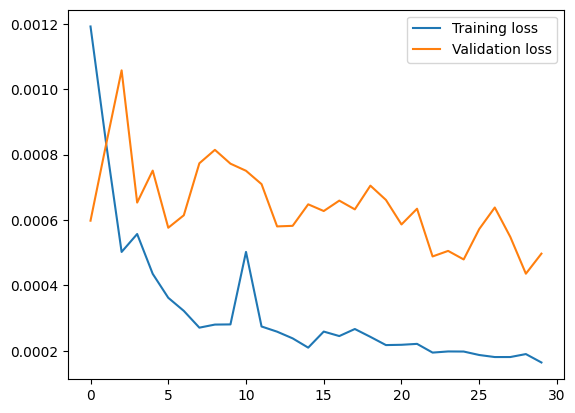

In [220]:
# Try to load weights
try:
    model.load_weights('48dam_lstm_weights.h5')
    print("Loaded model weights from disk")
except:
    print("No weights found, training model from scratch")
    # Fit the model
    history = model.fit(trainX, trainY, epochs=30, batch_size=32,
                    validation_split=0.1, verbose=1)
    # Save model weights after training
    model.save_weights('48dam_lstm_weights.h5')

    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.legend()
    plt.show()

26/26 [==============================] - 1s 7ms/step
(829, 1) (829, 1)
(829,)


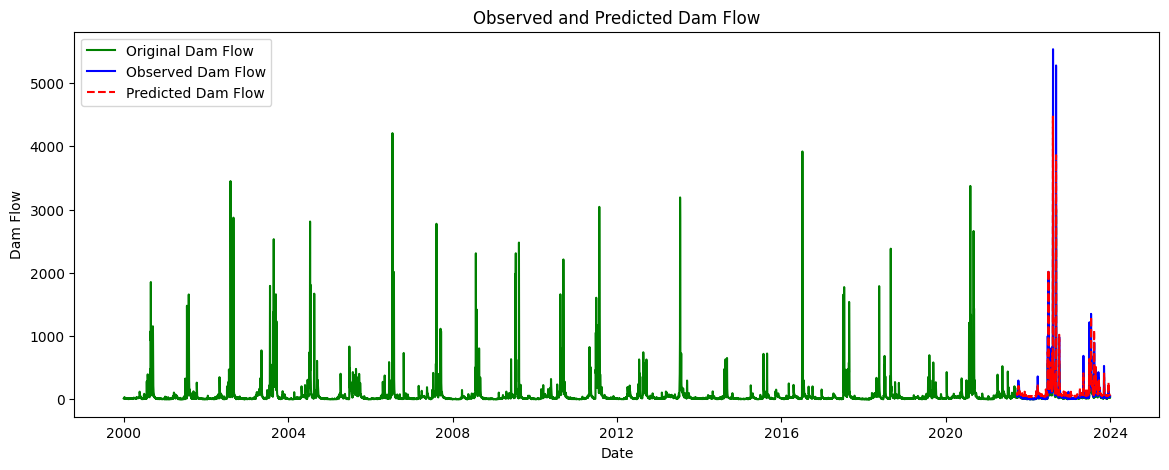

In [221]:
# prediction
prediction = model.predict(testX)
print(prediction.shape, testY.shape)

# generate array filled with means for prediction
# mean_values_pred = np.repeat(scaler.mean_[np.newaxis, :], prediction.shape[0], axis=0)

# # substitute predictions into the first column
# mean_values_pred[:, 0] = np.squeeze(prediction)

# inverse transform
y_pred = scaler_dam.inverse_transform(prediction)[:,0]

# # generate array filled with means for testY
# mean_values_testY = np.repeat(scaler.mean_[np.newaxis, :], testY.shape[0], axis=0)

# # substitute testY into the first column
# mean_values_testY[:, 0] = np.squeeze(testY)

# inverse transform
testY_original = scaler_dam.inverse_transform(testY)[:,0]
print(testY_original.shape)

# plotting
plt.figure(figsize=(14, 5))

# plot original 'Open' prices
plt.plot(dates, original_dam, color='green', label='Original Dam Flow')

# plot actual vs predicted
plt.plot(test_dates[seq_len:], testY_original, color='blue', label='Observed Dam Flow')
plt.plot(test_dates[seq_len:], y_pred, color='red', linestyle='--', label='Predicted Dam Flow')
plt.xlabel('Date')
plt.ylabel('Dam Flow')
plt.title('Observed and Predicted Dam Flow')
plt.legend()
plt.show()

In [222]:
test_dates

17385   2021-08-07
17386   2021-08-08
17387   2021-08-09
17388   2021-08-10
17389   2021-08-11
           ...    
18257   2023-12-27
18258   2023-12-28
18259   2023-12-29
18260   2023-12-30
18261   2023-12-31
Name: date, Length: 877, dtype: datetime64[ns]

In [223]:
testDates = []
for day in test_dates[24:]:
  testDates.append(day.strftime("%Y-%m-%d"))

testDates = pd.DataFrame(testDates)
pred_y = pd.DataFrame(y_pred)
origin_y = pd.DataFrame(testY_original)

lstm_include_dam = pd.concat([testDates, origin_y, pred_y], axis = 1)
print(lstm_include_dam)

lstm_include_dam = pd.DataFrame(lstm_include_dam)
lstm_include_dam.to_csv("data/lstm_include_dam.csv")

              0          0           0
0    2021-08-31  69.171331  101.085915
1    2021-09-01  48.227760   73.866425
2    2021-09-02  48.247118   79.395729
3    2021-09-03  48.234799   83.479576
4    2021-09-04  37.132120   78.909958
..          ...        ...         ...
848  2023-12-27        NaN         NaN
849  2023-12-28        NaN         NaN
850  2023-12-29        NaN         NaN
851  2023-12-30        NaN         NaN
852  2023-12-31        NaN         NaN

[853 rows x 3 columns]


In [224]:
testX_last = []

for x in testX:
  testX_last.append(x[-1])

print(testX_last[0])

testX_last = scaler.inverse_transform(testX_last)
testX_last = pd.DataFrame(testX_last)

print(testX_last)

lstm_include_x = pd.concat([testDates, testX_last,origin_y,pred_y], axis = 1)
lstm_include_x.to_csv("data/lstm_include_x.csv")

[0.01074791 0.         0.         0.         0.         0.        ]
          0     1    2    3    4    5
0    45.229   0.0  0.0  0.0  0.0  0.0
1    39.306  11.4  7.2  0.0  0.2  0.0
2    27.405   9.4  6.8  0.0  0.0  0.0
3    27.416   0.0  1.1  0.0  0.0  0.0
4    27.409   0.0  0.5  0.0  0.0  0.0
..      ...   ...  ...  ...  ...  ...
824  25.785   0.0  0.0  0.0  0.0  0.0
825  30.518   0.0  0.0  0.0  0.0  0.0
826  25.873   0.0  0.0  0.0  0.0  0.0
827  21.186   0.0  0.0  0.0  0.0  0.0
828  20.887   0.7  2.3  9.9  6.8  8.5

[829 rows x 6 columns]


In [225]:
print(lstm_include_x)

              0       0     1    2    3    4    5          0           0
0    2021-08-31  45.229   0.0  0.0  0.0  0.0  0.0  69.171331  101.085915
1    2021-09-01  39.306  11.4  7.2  0.0  0.2  0.0  48.227760   73.866425
2    2021-09-02  27.405   9.4  6.8  0.0  0.0  0.0  48.247118   79.395729
3    2021-09-03  27.416   0.0  1.1  0.0  0.0  0.0  48.234799   83.479576
4    2021-09-04  27.409   0.0  0.5  0.0  0.0  0.0  37.132120   78.909958
..          ...     ...   ...  ...  ...  ...  ...        ...         ...
848  2023-12-27     NaN   NaN  NaN  NaN  NaN  NaN        NaN         NaN
849  2023-12-28     NaN   NaN  NaN  NaN  NaN  NaN        NaN         NaN
850  2023-12-29     NaN   NaN  NaN  NaN  NaN  NaN        NaN         NaN
851  2023-12-30     NaN   NaN  NaN  NaN  NaN  NaN        NaN         NaN
852  2023-12-31     NaN   NaN  NaN  NaN  NaN  NaN        NaN         NaN

[853 rows x 9 columns]


In [226]:
# original_data = pd.DataFrame(testY_original)
# prediction_data = pd.DataFrame(y_pred)

# print(original_data)
# print(prediction_data)

# result = pd.concat([original_data,prediction_data],axis=1)
# result.to_csv("/content/drive/MyDrive/240410/result.csv")

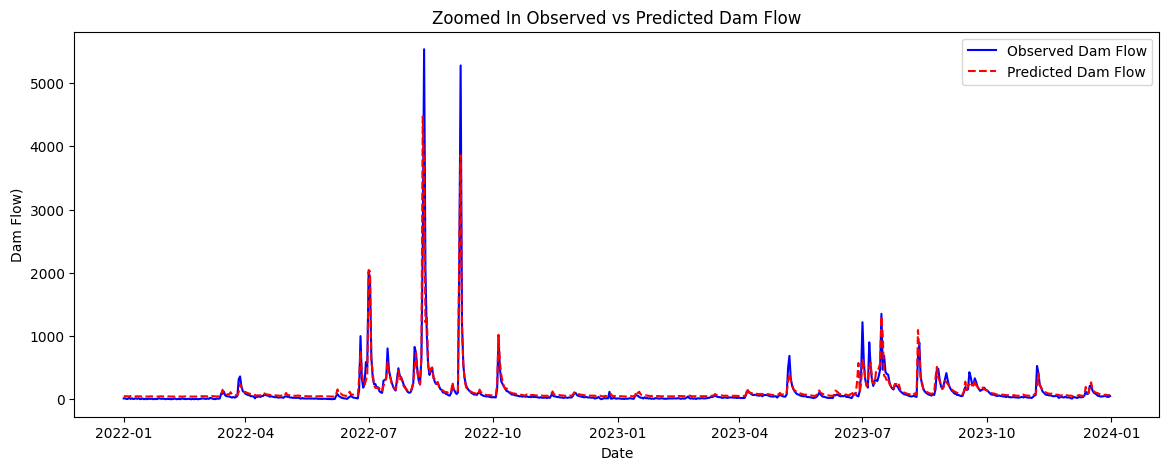

In [227]:
# Calculate the start and end indices for the zoomed plot
zoom_start = len(test_dates) - 365*2
zoom_end = len(test_dates)

# Create the zoomed plot
plt.figure(figsize=(14, 5))

# Adjust the start index for the testY_original and y_pred arrays
adjusted_start = zoom_start - seq_len

plt.plot(test_dates[zoom_start:zoom_end],
         testY_original[adjusted_start:zoom_end - zoom_start + adjusted_start],
         color='blue',
         label='Observed Dam Flow')

plt.plot(test_dates[zoom_start:zoom_end],
         y_pred[adjusted_start:zoom_end - zoom_start + adjusted_start ],
         color='red',
         linestyle='--',
         label='Predicted Dam Flow')

plt.xlabel('Date')
plt.ylabel('Dam Flow)')
plt.title('Zoomed In Observed vs Predicted Dam Flow')
plt.legend()
plt.show()

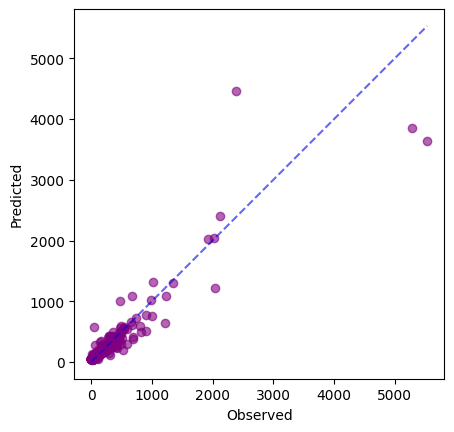

In [228]:
# 일대일 그래프

import matplotlib.pyplot as plt

x = np.arange(0,max(max(testY_original), max(y_pred)))
y = x
plt.scatter(testY_original[:], y_pred[:], color = 'purple', alpha = 0.6)
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.plot(x,y, color = 'blue',linestyle ='--', alpha = 0.6)
plt.gca().set_aspect("equal")

plt.show()

In [229]:
#RMSE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(testY_original, y_pred))
print('RMSE : %.2f' %(rmse))

# NSE
from numpy import mean
num_sum1 = 0
num_sum2 = 0
num_avg = mean(testY_original[:])
for i in range(len(testY_original)):
  num1 = testY_original[i] - y_pred[i]
  num_sum1 += num1**2
  num2 = testY_original[i] - num_avg
  num_sum2 += num2**2

nse = 1 - (num_sum1 / num_sum2)
print('NSE : %f' %nse)

# PBIAS
num_sum1 = 0
for i in range(len(testY_original)):
  num1 = testY_original[i] - y_pred[i]
  num_sum1 += num1

pbias = (num_sum1 / np.sum(testY_original[:])) * 100
print('PBIAS : %f' %pbias)

#R^2
import math

num_sum1 = 0
num_sum2 = 0
num_sum3 = 0
act_avg = mean(testY_original[:])
pred_avg = mean(y_pred[:])
for i in range(len(testY_original)):
  num1 = (testY_original[i] - act_avg) * (y_pred[i] - pred_avg)
  num_sum1 += num1
  num2 = testY_original[i] - pred_avg
  num_sum2 += num2**2
  num3 = y_pred[i] - pred_avg
  num_sum3 += num3**2

r_square = (num_sum1 / (math.sqrt(num_sum2)* math.sqrt(num_sum3)))**2
print('R Square : %f' %r_square)

RMSE : 130.19
NSE : 0.853857
PBIAS : -17.172891
R Square : 0.856578
